## CASE STUDY-TEXT MINING BANK REVIEW / COMPLAINT'S ANALYSIS

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import nltk
import string
import re

plt.rcParams['figure.figsize']=10,7
plt.rcParams['axes.grid']=False

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#### Importing data set

banks=pd.read_excel("/content/BankReviews.xlsx")

#### DATA AUDIT

In [ ]:
banks.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [ ]:
banks.shape

(505, 4)

In [ ]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [ ]:
banks.isna().sum().sum()  ## no missing values in the dataset

0

### TEXT PREPROCESSING

In [ ]:
## Dropping date variable as it will not play any role in text mining
banks=banks.drop(['Date'], axis=1)

In [ ]:
banks=banks.drop(['BankName'], axis=1)

In [ ]:
banks.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


### Text Lowercase

In [ ]:
# lowercase the text to reduce the size of the vocabulary of our text data.

def text_lowercase(text):
    return text.lower()

banks['Reviews_clean']=banks['Reviews'].apply(text_lowercase)

In [ ]:
banks.head(25)

,Stars,Reviews,Reviews_clean,positive,negative,neutral
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st...",0.226,0.018,0.756
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861
5,5,I had the pleasure of working with Wyndham Cap...,"[pleasure, working, wyndham, capital, septembe...",0.152,0.039,0.810
6,5,My experience with Mattison was beyond greatly...,"[experience, mattison, beyond, greatly, profes...",0.239,0.046,0.716
7,5,Patrick answered all my questions by email imm...,"[patrick, answered, question, email, immediate...",0.162,0.000,0.838
8,5,I loved working with this group of people! The...,"[loved, working, group, people, laughed, phone...",0.102,0.076,0.822
9,5,Great web interface for both the loan applicat...,"[great, web, interface, loan, application, doc...",0.154,0.000,0.846


#### Remove Numbers

In [ ]:
#### Remove Numbers by converting them into words by using inflect library

### Remove punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text_nonpunc="".join([char for char in text if char not in string.punctuation])
    return text_nonpunc

banks['Reviews_clean']=banks['Reviews_clean'].apply(remove_punct)

In [ ]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...


### Remove Whitespaces

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split()) ## This will remove all extra spaces etc.

In [ ]:
banks['Reviews_clean']=banks['Reviews_clean'].apply(lambda x:remove_whitespaces(x))

In [ ]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...


### Tokenization using re

In [ ]:
## Stopwords are unnecessary words like was, each etc.
## Tokenization means breaking text into individual words

import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

banks['Reviews_clean'] = banks['Reviews_clean'].apply(lambda x: tokenize(x))

banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, each, person, w..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, is, professional, and, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[we, had, a, past, experience, with, wyndham, ..."
3,5,We have been dealing with Brad Thomka from the...,"[we, have, been, dealing, with, brad, thomka, ..."
4,5,I can't express how grateful I am for the supp...,"[i, cant, express, how, grateful, i, am, for, ..."


### Remove stopwords

In [ ]:
# NLTK - Natural Language Tool Kit is library to perform analysis on text
# Corpus means bag of words
#stopword = nltk.corpus.stopwords.words('english')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(tokenized_list):
    filtered_text=[word for word in tokenized_list if word not in stop]
    return filtered_text

In [ ]:
banks['Reviews_clean']=banks['Reviews_clean'].apply(lambda x:remove_stopwords(x))

In [ ]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st..."
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi..."


## Lemmatization

In [ ]:
#import nltk
# nltk.download()- this is to download the library

In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
## Lemmatization is bring altogether all simmilar kind of words and create a single word out
import nltk
wn=nltk.stem.WordNetLemmatizer()

def lemmatizing(text):
    lemma=[wn.lemmatize(word) for word in text]
    return lemma

In [ ]:
banks['Reviews_clean']=banks['Reviews_clean'].apply(lemmatizing)

In [ ]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st..."
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi..."


### COUNT OF MOST FREQUENT WORDS

In [ ]:
word_count={}

for sentence in banks['Reviews_clean']:
    for word in sentence:

        if word not in word_count:
            word_count[word]=1

        else:
            word_count[word]+=1

In [ ]:
word_count

{'great': 139,
 'job': 21,
 'wyndham': 16,
 'capital': 12,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'u': 207,
 'move': 12,
 'refinance': 70,
 'process': 248,
 'smoothly': 14,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 51,
 'find': 19,
 'correct': 1,
 'product': 13,
 'mortgage': 151,
 'much': 38,
 'excellent': 29,
 'service': 103,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 106,
 'use': 48,
 'needed': 29,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 26,
 'wrong': 7,
 'encountered': 5,
 'servicer': 3,
 'dealing': 16,
 'previous': 13,
 'loan': 326,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 31,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 62,
 'recommend': 150,
 'brad': 7,
 'thomka': 3,
 'team': 112,
 'need': 41,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'time': 217,
 'help': 38,
 'entire': 47,
 'turned': 3,
 '

In [ ]:
## Converting word_count into the dataframe

df=pd.DataFrame(word_count.items(), columns=['word','word_count'])
df=df.sort_values('word_count', ascending=False).reset_index(drop=True)
df.head()

,word,word_count
0,x000d,715
1,loan,326
2,process,248
3,would,246
4,time,217


## SENTIMENT ANALYSIS

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyser=SentimentIntensityAnalyzer()

def sentiment_pos(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['pos']

def sentiment_neg(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neg']

def sentiment_neu(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neu']

def sentiment_comp(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['comp']

In [ ]:
df['positive']=df['word'].apply(sentiment_pos)
df['negative']=df['word'].apply(sentiment_neg)

In [ ]:
df.head()

,word,word_count,positive,negative
0,x000d,715,0.0,0.0
1,loan,326,0.0,0.0
2,process,248,0.0,0.0
3,would,246,0.0,0.0
4,time,217,0.0,0.0


### KEY POSITIVE WORDS

In [ ]:
df1=df.loc[df.positive>0]['word']
df1

,word
10,recommend
12,great
23,best
48,easy
49,thanks
...,...
2588,perfect
2589,superior
2594,feeling
2600,prize


### KEY NEGATIVE WORDS

In [ ]:
df2=df.loc[df.negative>0]['word']
df2

,word
89,hard
107,problem
114,poor
173,pay
177,stressful
...,...
2572,painful
2577,fighting
2581,forget
2598,ignored


In [ ]:
## CLASSIFICATION OF REVIEWS
banks['positive']=banks['Reviews'].apply(sentiment_pos)
banks['negative']=banks['Reviews'].apply(sentiment_neg)
banks['neutral']=banks['Reviews'].apply(sentiment_neu)

In [ ]:
banks.head()

,Stars,Reviews,Reviews_clean,positive,negative,neutral
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st...",0.226,0.018,0.756
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861


## WORDCLOUD

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
comment_words=''
stopwords=set(STOPWORDS)

for x in banks.Reviews:

    x=str(x)

    tokens=x.split()

    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    for y in tokens:
        comment_words=comment_words+y+' '

In [ ]:
comment_words

'great job, wyndham capital! each person was professional and helped us move through our refinance process smoothly. thank you! matthew richardson is professional and helpful. he helped us find the correct product for our mortgage. thank you very much for the excellent service, matthew! we had a past experience with wyndham mortgage and would without question use again and again if needed!! wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs. sincerest thanks wyndham!! ed & lind we have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us, but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending!! brad and wyndham went beyond the ex

In [ ]:
wordcloud=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

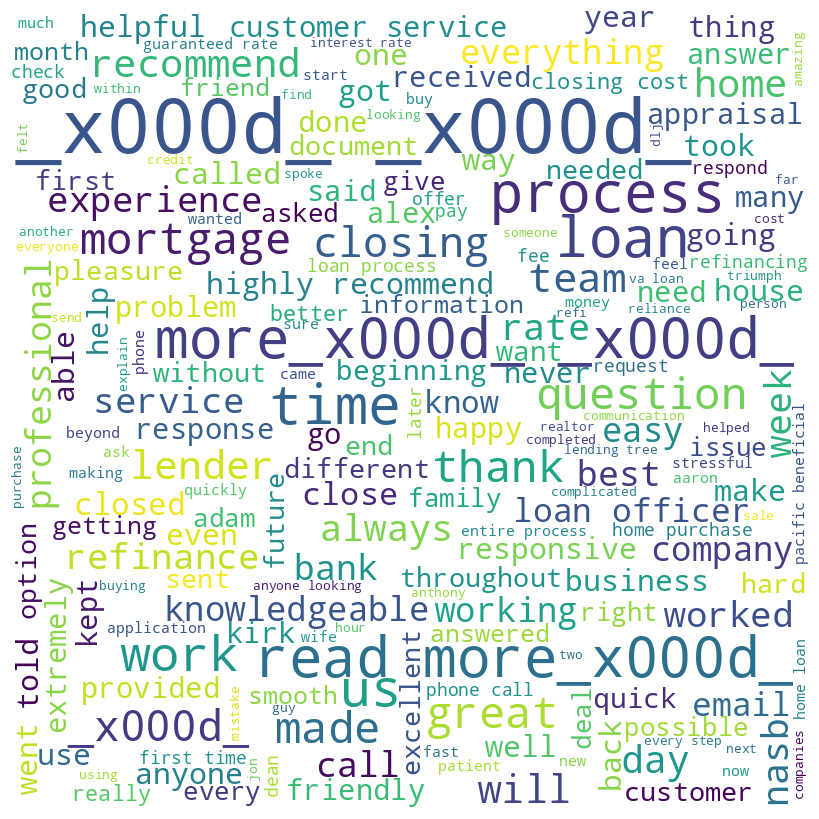

In [ ]:
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

## IDENTIFY KEY THEMES OF PROBLEMS USING K-MEANS ALGORITHM

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

problems = banks.loc[banks['Stars'] < 3]['Reviews']
problems.head()

,Reviews
17,This was the worst experience ever. It was lik...
18,"A good rate but a very frustrating process, co..."
19,They were not upfront. Learn from my mistake.....
20,"Initially, the Mortgage Broker was very friend..."
21,"Initially, the Mortgage Broker was very friend..."


### VECTORIZING RAW DATA: TF-IDF

In [ ]:
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(problems)

In [ ]:
X

<95x1338 sparse matrix of type '<class 'numpy.float64'>'
	with 4592 stored elements in Compressed Sparse Row format>

In [ ]:
# Now creating the Tf-Idf model
vectorizer=TfidfVectorizer(min_df=0.05, max_df=0.8, max_features=2000)
X = vectorizer.fit_transform(banks.Reviews).toarray()

## Logistic Regression technique

In [ ]:
from sklearn.model_selection import train_test_split

## Splitting the data into train and test

X_train,X_test,y_train,y_test= train_test_split(X, banks.Stars, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics

train_accuracy=metrics.accuracy_score(y_train, log.predict(X_train))
test_accuracy=metrics.accuracy_score(y_test, log.predict(X_test))

print("train_accuracy:", train_accuracy)
print("test_accuracy:", test_accuracy)

train_accuracy: 0.8980169971671388
test_accuracy: 0.881578947368421


In [ ]:
from sklearn import metrics

# creating a confusion matrix
cm = metrics.confusion_matrix(y_test, log.predict(X_test) )
cm

array([[ 16,  18],
       [  0, 118]])

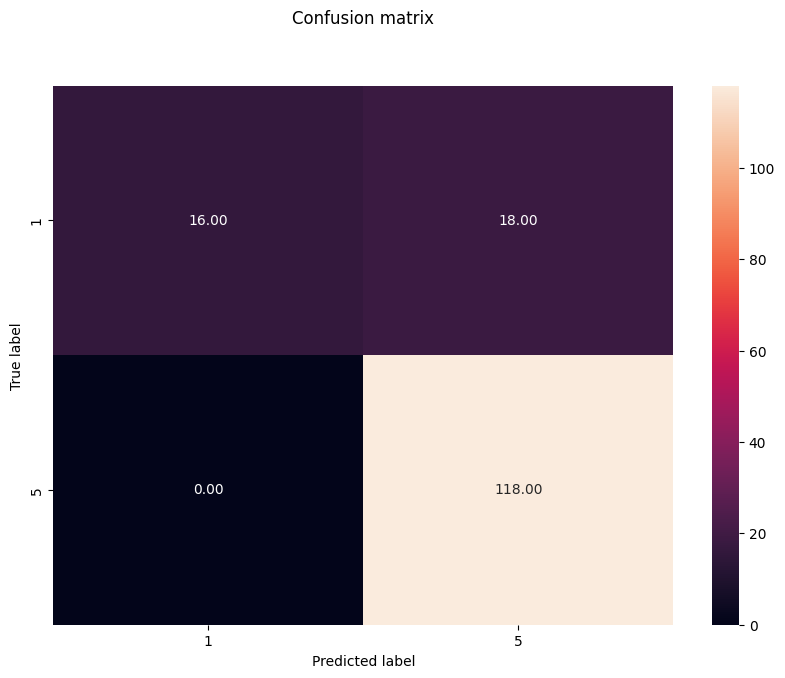

In [ ]:
# visualizing Confusion Matrix using Heatmap
sn.heatmap(cm, annot=True, fmt='.2f', xticklabels=["1", "5"], yticklabels=["1", "5"])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.autoscale(enable=True, axis='y')

In [ ]:
# Concatenating final prediction with original data set(all obersvations):
pred_stars = pd.DataFrame(log.predict(X), columns = ['predicted_stars'])
final = pd.concat([banks, pred_stars], axis=1)

In [ ]:
final.sample(25)

,Stars,Reviews,Reviews_clean,positive,negative,neutral,predicted_stars
198,5,_x000D_\nOutstanding service and always timely...,"[x000d, outstanding, service, always, timelyx0...",0.444,0.000,0.556,5
396,5,_x000D_\nA friend of mine told me that he just...,"[x000d, friend, mine, told, refinanced, house,...",0.247,0.008,0.745,5
355,5,_x000D_\nDean made the homebuying process so s...,"[x000d, dean, made, homebuying, process, simpl...",0.165,0.000,0.835,5
502,1,_x000D_\nWhat a horrible experience. We have e...,"[x000d, horrible, experience, excellent, credi...",0.116,0.160,0.723,1
464,5,_x000D_\nAaron was extremely help and very fri...,"[x000d, aaron, extremely, help, friendly, kept...",0.097,0.080,0.823,5
194,5,"_x000D_\nOur loan officer, Joey Hartegan, was ...","[x000d, loan, officer, joey, hartegan, friendl...",0.301,0.000,0.699,5
289,5,_x000D_\nWe had the pleasure of working with J...,"[x000d, pleasure, working, john, guerra, condo...",0.346,0.000,0.654,5
466,5,_x000D_\nAlex was extremely helpful and always...,"[x000d, alex, extremely, helpful, always, avai...",0.112,0.000,0.888,5
233,1,_x000D_\nThe Interest rate offered and time to...,"[x000d, interest, rate, offered, time, close, ...",0.047,0.076,0.877,1
380,5,_x000D_\nI met Mr. Germain through my daughter...,"[x000d, met, mr, germain, daughter, son, law, ...",0.107,0.112,0.781,5
